## Simple plotting with legend
This example focusses on removing some unnecessary elements from the default matplotlib plots which really annoy me.<br/>
Also, the default colors in matplotlib are quite ugly. I highly recommend moving away from matplotlib defaults. 
I suggest a few colors in this tutorial.

In [1]:
import os
from os import path
import json
import numpy as np
import matplotlib.pyplot as plt
import pprint

pp = pprint.PrettyPrinter(indent=4)
# Turn the interactive mode off otherwise the plots don't carry over across cells
plt.ioff() 

# Set Matplotlib Parameters
# plt.style.use('bmh')
plt.rc('text', usetex=True)   # Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k')
plt.rcParams['font.size'] = 16

### Load data and setup plot labels

In [2]:
data = json.load(open("../data/simple_plot.json"))
# pp.pprint(data)

# Set up plot specific labels
xticklabels = list(range(2, 21, 2))
xlabel = '\# of memory cells'
ylabel = 'F-score'

### Initialize the plot

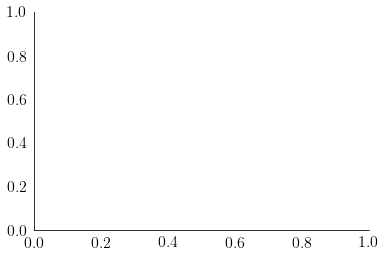

In [3]:
fig, ax = plt.subplots(1)

ax.grid(b=False)
# HIGHLY RECOMMENDED!
# For a plot we don't need the top and right spines/edges. 
# The plot looks like a box with these on. 
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)

# No need for ticks for this plot. I think most plots can do away with ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

fig

### Plot time
Color choices are really important. Choose high contrast colors for plots.


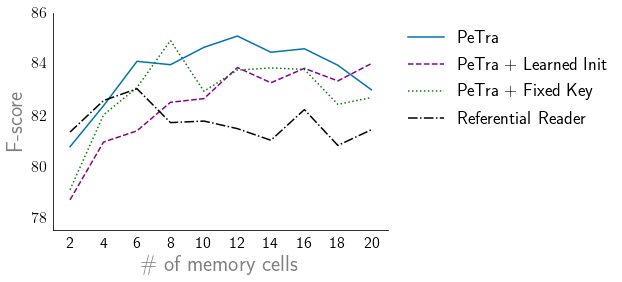

In [4]:
# This color list can be handy
color_list = ['#0173b2', 'darkmagenta', 'green' , 'k', '#8f9805', '#ca9161']
linestyle_list = ['-', '--', 'dotted', 'dashdot']

for idx, model in enumerate(data.keys()):
    plt.plot(np.arange(len(xticklabels)), data[model], 
             color=color_list[idx], linestyle=linestyle_list[idx], 
             label=model)

# Set the limit of the axes to properly align the plot and zoom in to contrast the performance 
ax.set_ylim([77.5, 86])
ax.set_xlim([-0.5, 9.5])
    
# Set ticks and labels
plt.xticks(np.arange(len(xticklabels)), xticklabels, rotation=0)
plt.xlabel(xlabel, color="gray", size=22)
plt.ylabel(ylabel, color="gray", size=22)


# Set legend labels
legend_labels = data.keys()
l = ax.legend(loc='upper left', fontsize=18, 
              bbox_to_anchor=(1.01, 1), frameon=False)

# Save plot - High DPI and without extra white space
plt.savefig(format='jpg', dpi=300, bbox_inches='tight', fname="../plots/simple_plot.jpg")
fig